In [28]:
import molmap
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt 

In [29]:
print(molmap.__version__)

1.3.6


# Data import

In [30]:
data_clean = pd.read_csv('data/data_clean.csv', index_col='Unnamed: 0')

In [31]:
data_feature = data_clean.iloc[: , 1:50]
data_feature = np.transpose(data_feature)

In [32]:
flist = data_feature.index.values

In [33]:
len(flist)
flist

array(['A/G', 'ALB', 'ALP', 'ALT', 'apoA', 'apoB', 'AST', 'AST/ALT', 'Ca',
       'CHO', 'CK', 'CKMB', 'Cl', 'CO2', 'CREA', 'DBIL', 'GGT', 'GLO',
       'GLU', 'HDL-C', 'IBIL', 'K', 'LDH', 'LDL-C', 'Mg', 'Na', 'P',
       'TBIL', 'TG', 'TP', 'UA', 'Urea', 'BASO%', 'EO%', 'HCT', 'HGB',
       'LYM%', 'MCH', 'MCHC', 'MCV', 'MON%', 'MPV', 'NEU%', 'PCT', 'PDW',
       'PLT', 'RBC', 'RDW-CV', 'WBC'], dtype=object)

# Rearrange data from 1x49 to 7x7 

### compute cosine distance

In [34]:
# compute cosine similarity of 49 features
# F_similarity = cosine_similarity(data_feature)
dist_cos = pd.DataFrame(squareform(pdist(data_feature, metric='cosine')),
                       index = flist, columns = flist)
dist_cos.shape
dist_cos.iloc[0:10,0:10]

,A/G,ALB,ALP,ALT,apoA,apoB,AST,AST/ALT,Ca,CHO
A/G,0.000000,0.089307,0.207094,0.338300,0.178394,0.204521,0.244483,0.177376,0.149524,0.180110
ALB,0.089307,0.000000,0.200172,0.328691,0.137320,0.165994,0.236386,0.180737,0.073163,0.139417
ALP,0.207094,0.200172,0.000000,0.289293,0.224941,0.188536,0.189210,0.175929,0.171413,0.196755
ALT,0.338300,0.328691,0.289293,0.000000,0.352113,0.301649,0.100410,0.449833,0.324404,0.310541
apoA,0.178394,0.137320,0.224941,0.352113,0.000000,0.163881,0.230685,0.156108,0.135552,0.113196
apoB,0.204521,0.165994,0.188536,0.301649,0.163881,0.000000,0.218740,0.193416,0.152090,0.029884
AST,0.244483,0.236386,0.189210,0.100410,0.230685,0.218740,0.000000,0.207195,0.224254,0.223670
AST/ALT,0.177376,0.180737,0.175929,0.449833,0.156108,0.193416,0.207195,0.000000,0.168065,0.186867
Ca,0.149524,0.073163,0.171413,0.324404,0.135552,0.152090,0.224254,0.168065,0.000000,0.135236
CHO,0.180110,0.139417,0.196755,0.310541,0.113196,0.029884,0.223670,0.186867,0.135236,0.000000


In [35]:
dist_cos

,A/G,ALB,ALP,ALT,apoA,apoB,AST,AST/ALT,Ca,CHO,...,MCV,MON%,MPV,NEU%,PCT,PDW,PLT,RBC,RDW-CV,WBC
A/G,0.000000,0.089307,0.207094,0.338300,0.178394,0.204521,0.244483,0.177376,0.149524,0.180110,...,0.159101,0.169944,0.166994,0.203093,0.189376,0.161930,0.192226,0.139409,0.183729,0.180755
ALB,0.089307,0.000000,0.200172,0.328691,0.137320,0.165994,0.236386,0.180737,0.073163,0.139417,...,0.173381,0.192438,0.175779,0.203658,0.163960,0.163230,0.166502,0.095945,0.188139,0.180082
ALP,0.207094,0.200172,0.000000,0.289293,0.224941,0.188536,0.189210,0.175929,0.171413,0.196755,...,0.205057,0.173969,0.202361,0.194466,0.148426,0.204265,0.149856,0.184909,0.165771,0.149639
ALT,0.338300,0.328691,0.289293,0.000000,0.352113,0.301649,0.100410,0.449833,0.324404,0.310541,...,0.308297,0.296032,0.321826,0.333344,0.340012,0.313101,0.342102,0.294136,0.309584,0.307357
apoA,0.178394,0.137320,0.224941,0.352113,0.000000,0.163881,0.230685,0.156108,0.135552,0.113196,...,0.148608,0.200253,0.188314,0.190841,0.190818,0.175524,0.187837,0.167567,0.156397,0.186532
apoB,0.204521,0.165994,0.188536,0.301649,0.163881,0.000000,0.218740,0.193416,0.152090,0.029884,...,0.156078,0.177484,0.191966,0.178047,0.156487,0.180069,0.154172,0.149635,0.152701,0.153096
AST,0.244483,0.236386,0.189210,0.100410,0.230685,0.218740,0.000000,0.207195,0.224254,0.223670,...,0.202122,0.192989,0.223172,0.223343,0.240374,0.215966,0.239629,0.214109,0.190088,0.203926
AST/ALT,0.177376,0.180737,0.175929,0.449833,0.156108,0.193416,0.207195,0.000000,0.168065,0.186867,...,0.153928,0.157741,0.171883,0.166673,0.163399,0.170196,0.161397,0.193369,0.130076,0.157397
Ca,0.149524,0.073163,0.171413,0.324404,0.135552,0.152090,0.224254,0.168065,0.000000,0.135236,...,0.170516,0.188935,0.188705,0.200381,0.146617,0.175394,0.145480,0.113946,0.173366,0.165427
CHO,0.180110,0.139417,0.196755,0.310541,0.113196,0.029884,0.223670,0.186867,0.135236,0.000000,...,0.147378,0.181643,0.187544,0.188407,0.162778,0.177280,0.161022,0.146704,0.158383,0.170373


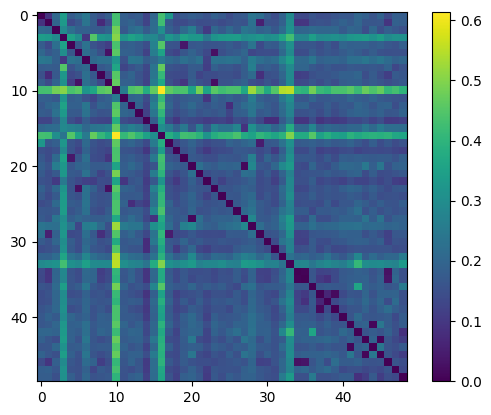

In [36]:
plt.imshow(dist_cos)
plt.colorbar()

### PCA based on cosine distance between features

In [37]:
import umap
import  seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=15)   # select top 15 
pca.fit(dist_cos)              #training
dist_PCA = pca.fit_transform(dist_cos)
pca.fit(dist_cos).explained_variance_ratio_.sum()
dist_PCA.shape

(49, 15)

In [39]:
reducer = umap.UMAP(random_state=42) 
scaled_data = StandardScaler().fit_transform(dist_PCA)
embedding = reducer.fit_transform(scaled_data)
embedding = pd.DataFrame(embedding,index = flist)
embedding[:10]

,0,1
A/G,-3.883605,3.023391
ALB,-4.502982,2.694830
ALP,-4.838204,-0.086578
ALT,-3.139723,-0.552661
apoA,-2.358115,2.269547
apoB,-1.984547,1.262369
AST,-3.370083,-0.910716
AST/ALT,-4.280820,-0.231558
Ca,-4.679904,2.228431
CHO,-1.849180,1.742751


In [40]:
type(embedding)
import openpyxl
embedding.to_excel("Embedding_feature.xlsx")

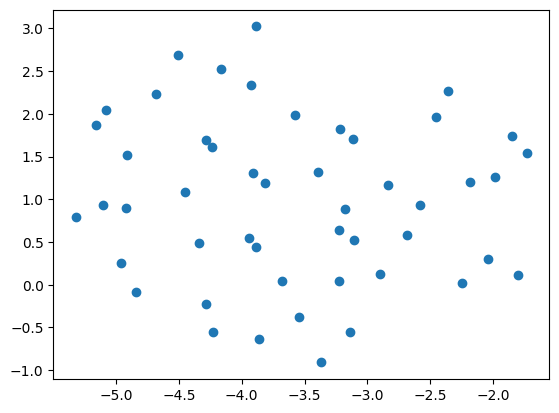

In [41]:
plt.scatter(embedding.iloc[:,0:1], embedding.iloc[:, 1:2]) 

### Conduct lapjv for redistribution from 2d scatter to 7x7 matrix on PCA 2d embedding

In [42]:
from lapjv import lapjv
fmap_shape = None
indices = None
indices_list = None

split_channels = True

In [43]:
embedding_2d = embedding.iloc[:,0:2].values
N = len(embedding_2d)

In [44]:
### decide the dimension
size1 = int(np.ceil(np.sqrt(N)))  #7
size2 = int(np.ceil(N/size1))  #7
grid_size = (size1, size2)  # (7, 7)

In [45]:
grid_size

(7, 7)

### initiate the grid

In [46]:
grid = np.dstack(np.meshgrid(np.linspace(0, 1, size2),
                             np.linspace(0, 1, size1))).reshape(-1, 2)

In [47]:
grid[0:10] # (49, 2)

array([[0.        , 0.        ],
       [0.16666667, 0.        ],
       [0.33333333, 0.        ],
       [0.5       , 0.        ],
       [0.66666667, 0.        ],
       [0.83333333, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.16666667],
       [0.16666667, 0.16666667],
       [0.33333333, 0.16666667]])

In [48]:
grid_map = grid[:N]

In [49]:
grid_map[0:10]

array([[0.        , 0.        ],
       [0.16666667, 0.        ],
       [0.33333333, 0.        ],
       [0.5       , 0.        ],
       [0.66666667, 0.        ],
       [0.83333333, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.16666667],
       [0.16666667, 0.16666667],
       [0.33333333, 0.16666667]])

### compute cost matrix for asssignment

In [50]:
from scipy.spatial.distance import cdist
cost_matrix = cdist(grid_map, embedding_2d, "sqeuclidean").astype(np.float)

In [51]:
cost_matrix
cost_matrix.shape

(49, 49)

In [52]:
cost_matrix = cost_matrix * (1000 / cost_matrix.max())

In [53]:
cost_matrix

array([[584.63301363, 664.65746711, 565.14235383, ..., 403.87113334,
        182.41389995, 384.8046398 ],
       [616.54726108, 701.55463709, 604.73640592, ..., 433.33336987,
        203.8836082 , 416.1480058 ],
       [649.80235139, 739.79264992, 645.67130085, ..., 464.13644925,
        226.6941593 , 448.83221466],
       ...,
       [598.5301347 , 714.3459991 , 759.87795462, ..., 458.25970011,
        255.34657233, 485.09193136],
       [635.80775357, 756.6065405 , 804.83537812, ..., 493.08530805,
        282.17965199, 521.79866877],
       [674.42621529, 800.20792474, 851.13364447, ..., 529.25175885,
        310.3535745 , 559.84624905]])

In [54]:
row_asses, col_asses, c = lapjv(cost_matrix)

In [55]:
c

(21117.3515625,
 array([2.58914795e+01, 6.05643921e+01, 9.65781250e+01, 1.30870453e+02,
        1.62675934e+02, 1.93968994e+02, 2.19412659e+02, 2.49036865e+01,
        6.54521790e+01, 1.01432770e+02, 1.34392700e+02, 1.65065445e+02,
        1.94455765e+02, 2.19180649e+02, 2.23939209e+01, 6.35173950e+01,
        9.98866882e+01, 1.34388275e+02, 1.64545502e+02, 1.93605347e+02,
        2.19570709e+02, 1.93347168e+01, 5.96684570e+01, 9.84262085e+01,
        1.32451263e+02, 1.62693481e+02, 1.91603088e+02, 2.18446060e+02,
        1.65663452e+01, 5.64777222e+01, 9.25708008e+01, 1.27589355e+02,
        1.59583008e+02, 1.88537033e+02, 2.12983170e+02, 7.69464111e+00,
        4.88773804e+01, 8.51854858e+01, 1.20103485e+02, 1.51927826e+02,
        1.82209564e+02, 2.06763062e+02, 3.66210938e-03, 3.69890747e+01,
        7.25275879e+01, 1.08690704e+02, 1.44627472e+02, 1.73771332e+02,
        2.00117157e+02], dtype=float32),
 array([453.90268  , 558.62036  , 539.25085  , 194.3807   , 110.95346  ,
      

In [56]:
row_asses

array([ 2, 10, 11, 22,  6,  3, 15, 16,  7, 41, 40, 32, 31, 20, 12, 24, 44,
       39, 37, 18, 27, 25, 13, 33, 48, 38, 47, 28, 21, 43, 45, 42, 30, 14,
        5, 26,  8, 17, 46, 35, 19, 23, 36,  1, 29,  0, 34,  4,  9],
      dtype=int32)

In [57]:
col_asses # store the positon info

array([45, 43,  0,  5, 47, 34,  4,  8, 36, 48,  1,  2, 14, 22, 33,  6,  7,
       37, 19, 40, 13, 28,  3, 41, 15, 21, 35, 20, 27, 44, 32, 12, 11, 23,
       46, 39, 42, 18, 25, 17, 10,  9, 31, 29, 16, 30, 38, 26, 24],
      dtype=int32)

In [58]:
fmap_shape = grid_size
indices = col_asses

### assign the features

In [59]:
embedding['idx'] = range(len(embedding))
embedding['indices'] = indices

In [61]:
def _apply_split(x):
    return x[['idx','indices']].to_dict('list')

In [63]:
embedding[['idx','indices']].to_dict('list')

{'idx': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 'indices': [45,
  43,
  0,
  5,
  47,
  34,
  4,
  8,
  36,
  48,
  1,
  2,
  14,
  22,
  33,
  6,
  7,
  37,
  19,
  40,
  13,
  28,
  3,
  41,
  15,
  21,
  35,
  20,
  27,
  44,
  32,
  12,
  11,
  23,
  46,
  39,
  42,
  18,
  25,
  17,
  10,
  9,
  31,
  29,
  16,
  30,
  38,
  26,
  24]}

In [64]:
# sidx = embedding[['idx','indices']].to_dict('list')
sidx = embedding[['idx','indices']]

In [65]:
channels = sidx.index.tolist()

In [66]:
sidx[0:3]

,idx,indices
A/G,0,45
ALB,1,43
ALP,2,0


### the indices and fmap were used to assign 1d info to 2d descriptor in a fixed order

In [67]:
m,n = fmap_shape
# colormaps = molmap.extract.colormaps  

In [68]:
position = np.zeros(fmap_shape, dtype='O').reshape(m*n,)  # (1332,)

In [69]:
position[col_asses] = flist

In [70]:
col_asses

array([45, 43,  0,  5, 47, 34,  4,  8, 36, 48,  1,  2, 14, 22, 33,  6,  7,
       37, 19, 40, 13, 28,  3, 41, 15, 21, 35, 20, 27, 44, 32, 12, 11, 23,
       46, 39, 42, 18, 25, 17, 10,  9, 31, 29, 16, 30, 38, 26, 24],
      dtype=int32)

In [71]:
position

array(['ALP', 'CK', 'CKMB', 'LDH', 'AST', 'ALT', 'DBIL', 'GGT', 'AST/ALT',
       'MPV', 'MON%', 'BASO%', 'Urea', 'IBIL', 'Cl', 'Mg', 'PDW', 'MCV',
       'MCH', 'GLU', 'TBIL', 'Na', 'CO2', 'EO%', 'WBC', 'MCHC', 'RDW-CV',
       'TG', 'K', 'PCT', 'PLT', 'NEU%', 'UA', 'CREA', 'apoB', 'P', 'Ca',
       'GLO', 'RBC', 'HGB', 'HDL-C', 'LDL-C', 'LYM%', 'ALB', 'TP', 'A/G',
       'HCT', 'apoA', 'CHO'], dtype=object)

In [72]:
flist[0]

'A/G'

In [73]:
len(flist)

49

In [74]:
position[0]

'ALP'

In [75]:
position = position.reshape(m, n)

In [76]:
position

array([['ALP', 'CK', 'CKMB', 'LDH', 'AST', 'ALT', 'DBIL'],
       ['GGT', 'AST/ALT', 'MPV', 'MON%', 'BASO%', 'Urea', 'IBIL'],
       ['Cl', 'Mg', 'PDW', 'MCV', 'MCH', 'GLU', 'TBIL'],
       ['Na', 'CO2', 'EO%', 'WBC', 'MCHC', 'RDW-CV', 'TG'],
       ['K', 'PCT', 'PLT', 'NEU%', 'UA', 'CREA', 'apoB'],
       ['P', 'Ca', 'GLO', 'RBC', 'HGB', 'HDL-C', 'LDL-C'],
       ['LYM%', 'ALB', 'TP', 'A/G', 'HCT', 'apoA', 'CHO']], dtype=object)

In [77]:
np.save('data_intermediate/Feature_position.npy', position)

In [78]:
x = []
for i in range(n):
    x.extend([i]*m)

In [79]:
y = list(range(m))*n

In [80]:
v = position.reshape(m*n, order = 'f')  # order

In [81]:
df = pd.DataFrame(list(zip(x,y, v)), columns = ['x', 'y', 'v'])
df[0:10]

,x,y,v
0,0,0,ALP
1,0,1,GGT
2,0,2,Cl
3,0,3,Na
4,0,4,K
5,0,5,P
6,0,6,LYM%
7,1,0,CK
8,1,1,AST/ALT
9,1,2,Mg


### fmap for visualization of metrics

In [82]:
from highcharts import Highchart

ftype = 'fingerprint'
method = 'umap'
metric = 'cosine'

title = '2D emmbedding of %s based on %s method' % (ftype, method)
subtitle = 'number of %s: %s, metric method: %s' % (ftype, len(flist), metric)
name = '%s_%s_%s_%s_%s' % (ftype,len(flist), metric, method, 'scatter')

# xy = molmap.embedded.embedding_

H = Highchart(width=400, height=400)
H.set_options('chart', {'type': 'heatmap', 'zoomType': 'xy'})
H.set_options('title', {'text': title})
H.set_options('subtitle', {'text': subtitle})

In [83]:
H.set_options('xAxis', {'title': None,                         
                        'min': 0, 'max': fmap_shape[1],
                        'startOnTick': False,
                        'endOnTick': False,    
                        'allowDecimals':False,
                        'labels':{'style':{'fontSize':20}}})


H.set_options('yAxis', {'title': {'text': ' ', 'style':{'fontSize':20}}, 
                        'startOnTick': False,
                        'endOnTick': False,
                        'gridLineWidth': 0,
                        'reversed': True,
                        'min': 0, 'max': fmap_shape[0],
                        'allowDecimals':False,
                        'labels':{'style':{'fontSize':20}}})



H.set_options('legend', {'align': 'right', 'layout': 'vertical',
                         'margin': 1, 'verticalAlign': 'top', 
                         'y': 60, 'symbolHeight': 12, 'floating': False,})


H.set_options('tooltip', {'headerFormat': '<b>{series.name}</b><br>',
                          'pointFormat': '{point.v}'})


H.set_options('plotOptions', {'series': {'turboThreshold': 5000}})


H.add_data_set(df.to_dict('records'), 'heatmap', 
                name = 'record',
                color = '#005dff',#dataLabels = {'enabled': True, 'color': '#000000','#005dff'}
                )

In [84]:
H

# Convert 1d data to CNN available 2d matrix

### trail on converting data

In [85]:
a = np.linspace(0,96,49)
col_asses

array([45, 43,  0,  5, 47, 34,  4,  8, 36, 48,  1,  2, 14, 22, 33,  6,  7,
       37, 19, 40, 13, 28,  3, 41, 15, 21, 35, 20, 27, 44, 32, 12, 11, 23,
       46, 39, 42, 18, 25, 17, 10,  9, 31, 29, 16, 30, 38, 26, 24],
      dtype=int32)

In [86]:
print(fmap_shape)
b = np.zeros(fmap_shape, dtype='O').reshape(m*n,)
b# (49,)

(7, 7)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=object)

In [87]:
b[col_asses] = a
b = b.reshape(7,7)
b

array([[4.0, 20.0, 22.0, 44.0, 12.0, 6.0, 30.0],
       [32.0, 14.0, 82.0, 80.0, 64.0, 62.0, 40.0],
       [24.0, 48.0, 88.0, 78.0, 74.0, 36.0, 54.0],
       [50.0, 26.0, 66.0, 96.0, 76.0, 94.0, 56.0],
       [42.0, 86.0, 90.0, 84.0, 60.0, 28.0, 10.0],
       [52.0, 16.0, 34.0, 92.0, 70.0, 38.0, 46.0],
       [72.0, 2.0, 58.0, 0.0, 68.0, 8.0, 18.0]], dtype=object)

In [88]:
embedding[0:10]
# type(embedding)

,0,1,idx,indices
A/G,-3.883605,3.023391,0,45
ALB,-4.502982,2.694830,1,43
ALP,-4.838204,-0.086578,2,0
ALT,-3.139723,-0.552661,3,5
apoA,-2.358115,2.269547,4,47
apoB,-1.984547,1.262369,5,34
AST,-3.370083,-0.910716,6,4
AST/ALT,-4.280820,-0.231558,7,8
Ca,-4.679904,2.228431,8,36
CHO,-1.849180,1.742751,9,48


### Convert data

In [89]:
col_asses

array([45, 43,  0,  5, 47, 34,  4,  8, 36, 48,  1,  2, 14, 22, 33,  6,  7,
       37, 19, 40, 13, 28,  3, 41, 15, 21, 35, 20, 27, 44, 32, 12, 11, 23,
       46, 39, 42, 18, 25, 17, 10,  9, 31, 29, 16, 30, 38, 26, 24],
      dtype=int32)

In [90]:
data_feature = data_clean.iloc[: , 1:50]

In [91]:
nrow = data_feature.index.size
x_train = []

for i in range(nrow):
    rec = np.array(data_feature.iloc[i,:])
    empty = np.zeros(fmap_shape, dtype='O').reshape(m*n,)
    empty[col_asses] = rec
    rec = empty.reshape(7,7)
    x_train.append(rec)

x_train = np.array(x_train)

In [92]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y_train = np.array(data_clean['dig'])
y_train[y_train == 'N'] = 0
y_train[y_train == 'P'] = 1
y_train = to_categorical(y_train, num_classes)

In [93]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

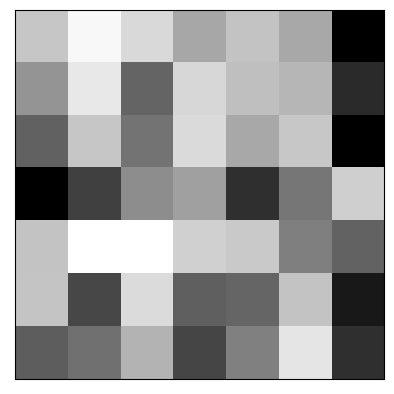

In [94]:
b = np.around(x_train[9].astype('float32'),4)
plt.imshow(b,cmap="Greys")
plt.xticks([])
plt.yticks([])
plt.savefig('example_plot.pdf')

In [95]:
np.save('data_intermediate/x_train.npy', x_train)    # .npy extension is added if not given
np.save('data_intermediate/y_train.npy', y_train)  
d = np.load('data_intermediate/x_train.npy',allow_pickle=True)
d[0] == x_train[0]
# x_train == d
d.shape

(22280, 7, 7)